___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". This is the last medium project of ***Machine Learning*** course.

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from the membership cards of a big mall.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will spesify the different variables to use for cluster analysis.

The last step in customer segmentation is to group the customers into distinct clusters based on their characteristics and behaviors. One of the most common methods for clustering is ***K-Means Clustering***, which partitions the data into k clusters based on the distance to the cluster centroids. Other clustering methods include ***hierarchical clustering***, density-based clustering, and spectral clustering. Each cluster can be assigned a label that describes its main features and preferences.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

---
---

# #Tasks

Mentoring Prep. and self study####

#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- Explore Data

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering based on Age and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Clustering based on Annual Income and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering

    *i. Determine optimal number of clusters using Dendogram*

    *ii. Apply Agglomerative Clustering*

    *iii. Visualizing and Labeling All the Clusters*

- Conclusion

---
---

## 1. Import Libraries, Load Dataset, Exploring Data

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annual income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. You have to segment these customers based on the details given.

#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


#### Load Dataset

In [2]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### Explore Data

You can rename columns to more usable, if you need.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [6]:
# lower-case columns 
new_column_names = {
    'CustomerID': 'customer_id',
    'Gender': 'gender',
    'Age': 'age',
    'Annual Income (k$)': 'annual_income',
    'Spending Score (1-100)': 'spending_score'
}

df.rename(columns=new_column_names, inplace=True)
df.head()


,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
#missing values
df.isnull().sum()

customer_id       0
gender            0
age               0
annual_income     0
spending_score    0
dtype: int64

In [8]:
# Cduplicated rows
df.drop_duplicates(inplace=True)
df.shape

(200, 5)

In [9]:
# check if there is any duplicated customer_id

duplicated_rows = df[df.duplicated(subset=['customer_id'], keep=False)]
print(duplicated_rows)

# Empty DataFrame indicates no customer_id is duplicated

Empty DataFrame
Columns: [customer_id, gender, age, annual_income, spending_score]
Index: []


In [10]:
for col in df.columns:
    print("Column", col, "has", df[col].nunique(), "unique values")

Column customer_id has 200 unique values
Column gender has 2 unique values
Column age has 51 unique values
Column annual_income has 64 unique values
Column spending_score has 84 unique values


---
---

## 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.





In [11]:
df = df.drop(columns=['customer_id'])

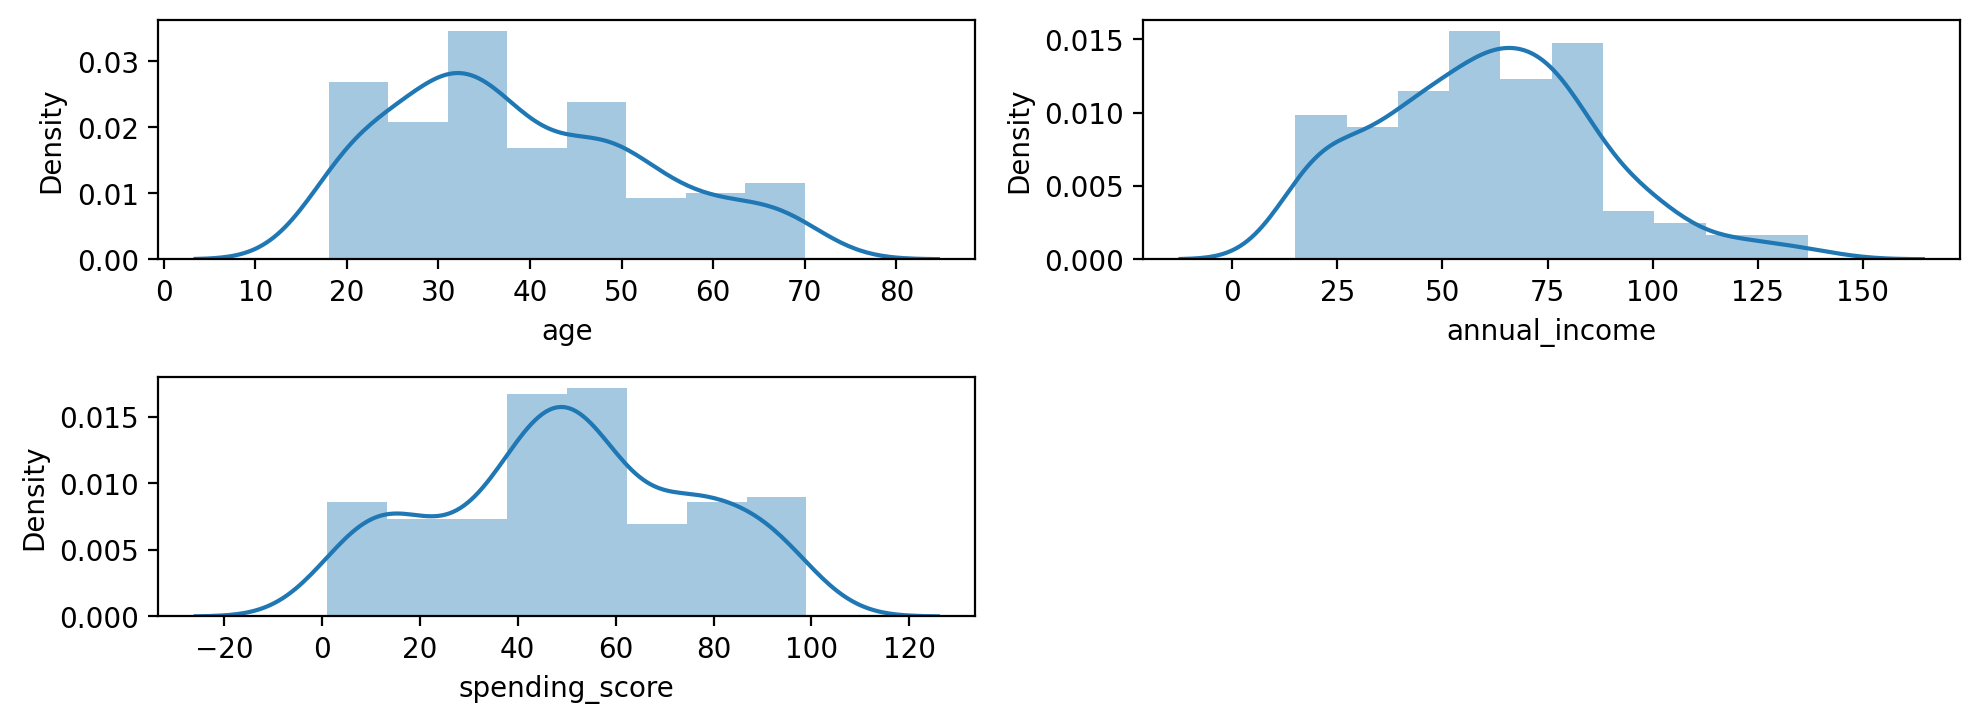

In [12]:
# Distribution of the numericalfeatures

fig = plt.figure(figsize=(10,14), dpi=200)
for i, col in enumerate(df.drop(columns='gender').columns):
        plt.subplot(8,2,i+1)
        sns.distplot(df[col],)
plt.tight_layout();


<Axes: xlabel='spending_score', ylabel='gender'>

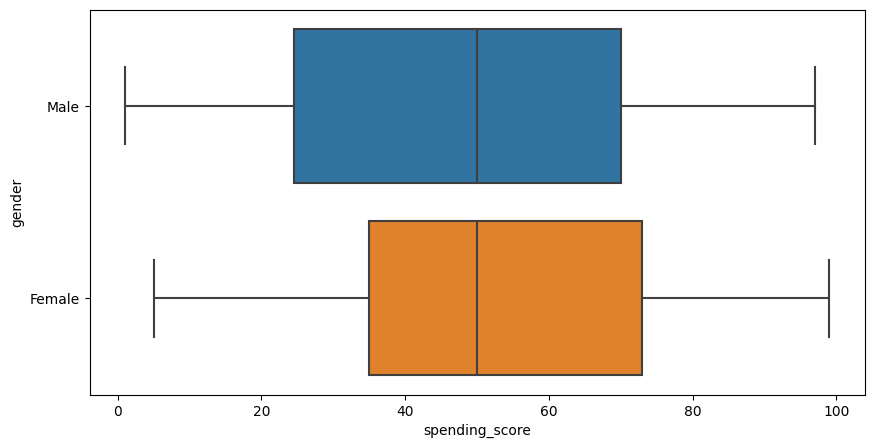

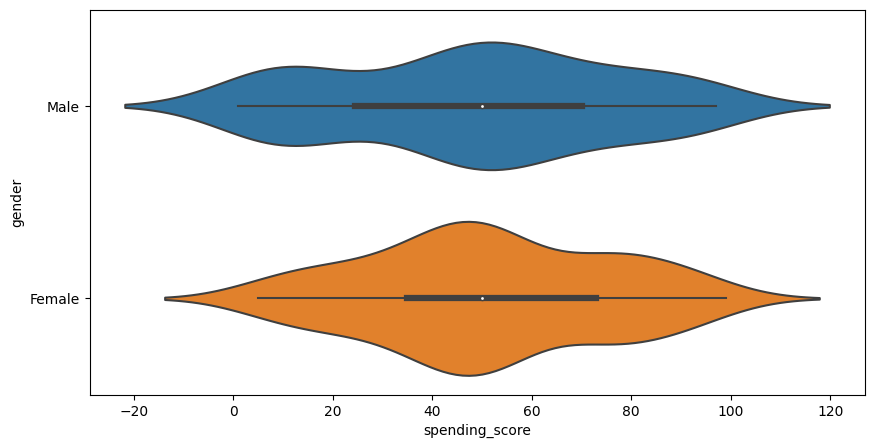

In [13]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='spending_score', y='gender')
plt.figure(figsize=(10,5))
sns.violinplot(data=df, x='spending_score', y='gender')

<Axes: xlabel='annual_income', ylabel='gender'>

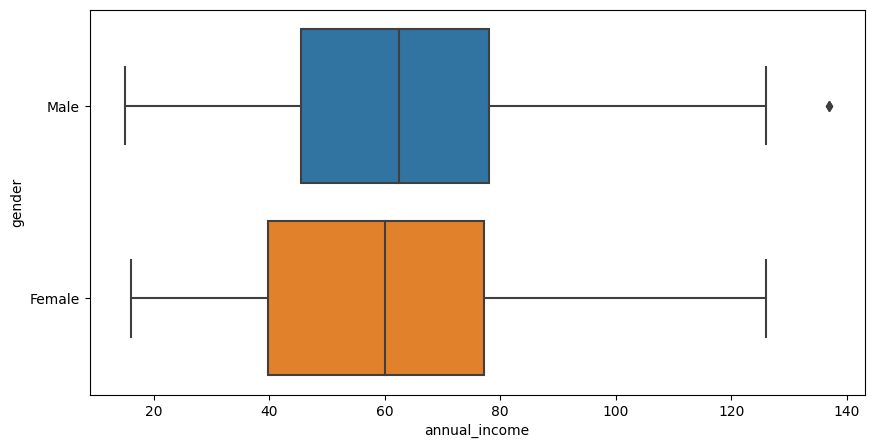

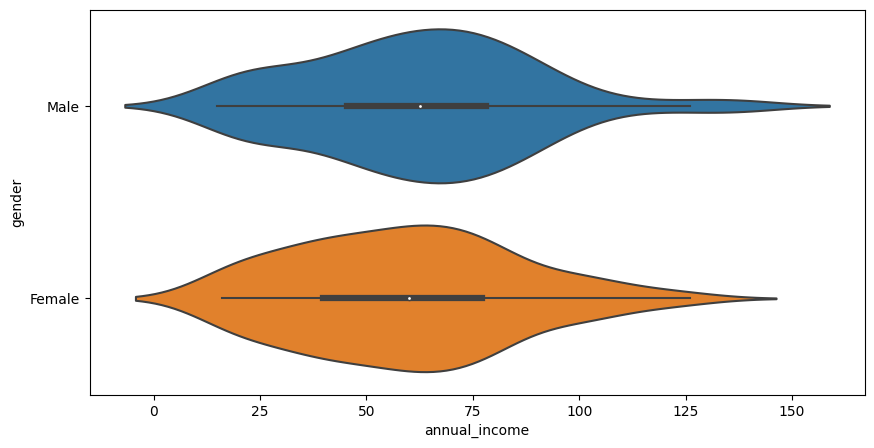

In [14]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='annual_income', y='gender')
plt.figure(figsize=(10,5))
sns.violinplot(data=df, x='annual_income', y='gender')

<Axes: xlabel='age', ylabel='gender'>

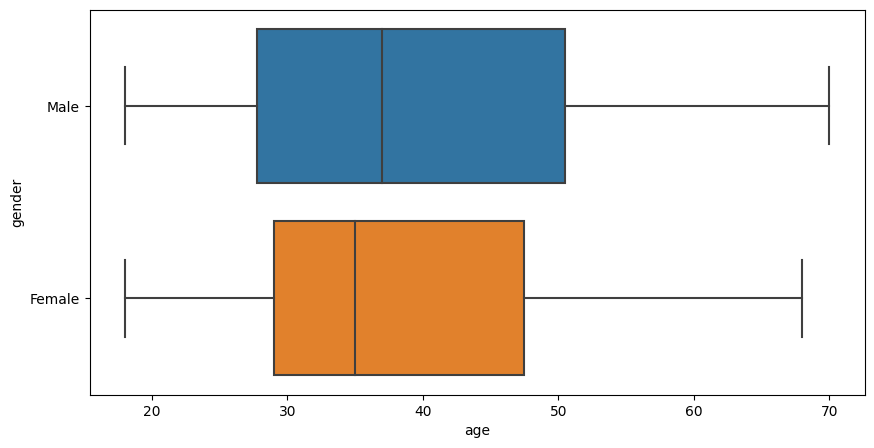

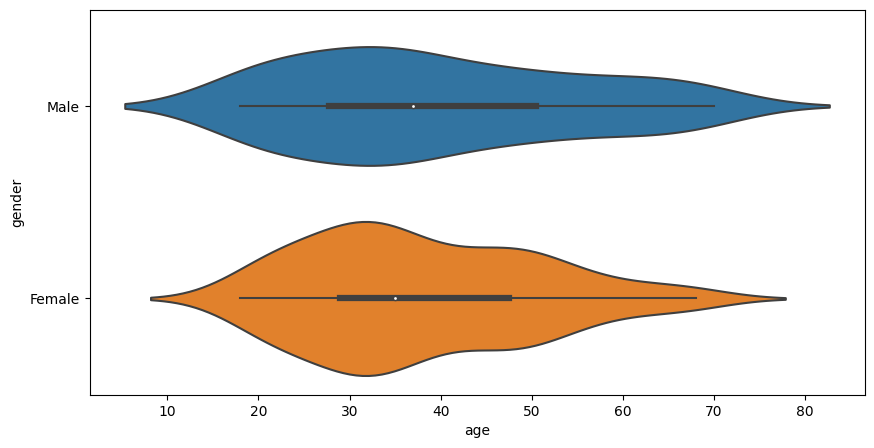

In [15]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='age', y='gender')
plt.figure(figsize=(10,5))
sns.violinplot(data=df, x='age', y='gender')

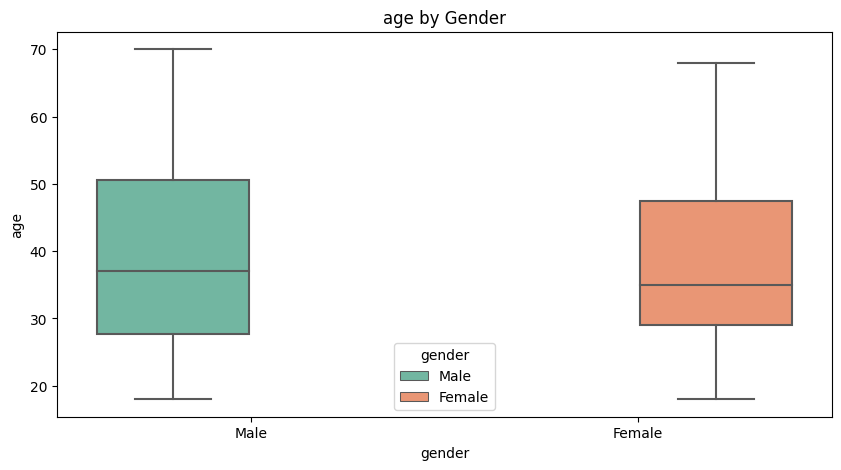

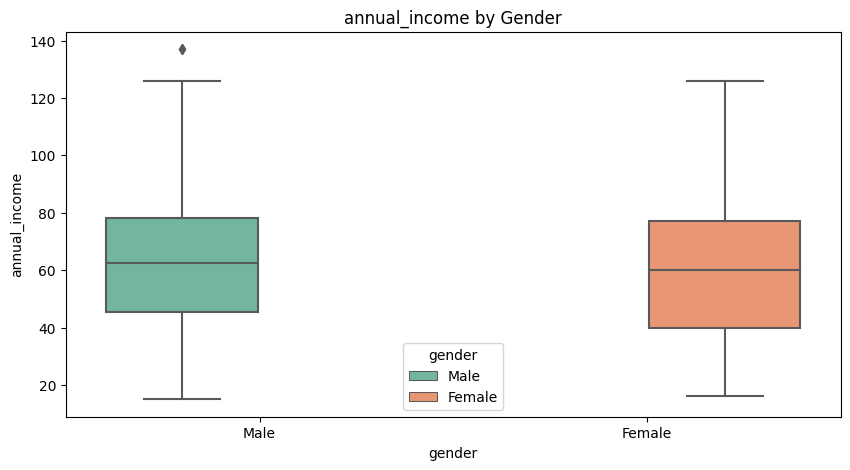

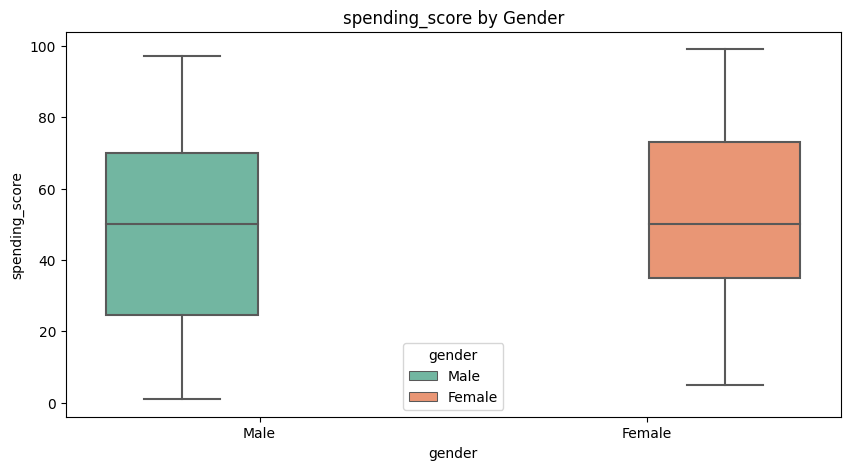

In [16]:
for col in df.drop("gender", axis=1).columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=df, x="gender", y=col, hue="gender", palette="Set2")
    plt.title(f"{col} by Gender")
plt.show()

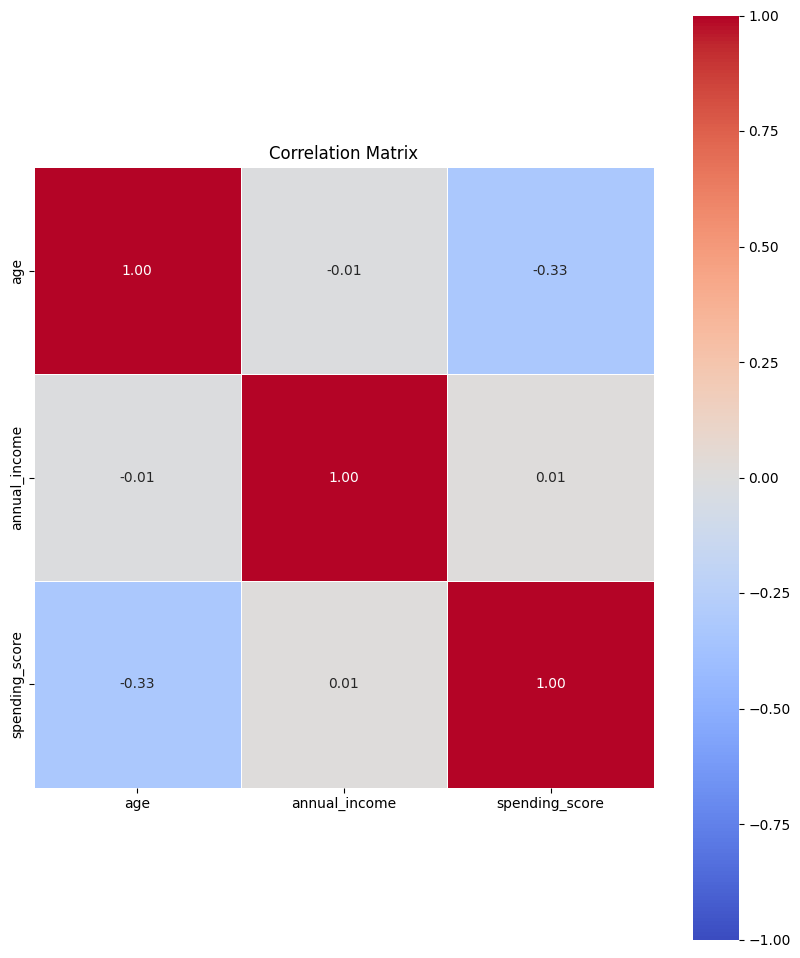

In [17]:
corr_matrix = df.drop(columns='gender').corr()

plt.figure(figsize=(10, 12))
sns.heatmap(corr_matrix,square=True, annot=True, fmt=".2f", annot_kws={"size": 10}, linewidths=.5, vmin=-1, vmax=1, cmap='coolwarm')
plt.title("Correlation Matrix")

plt.show()

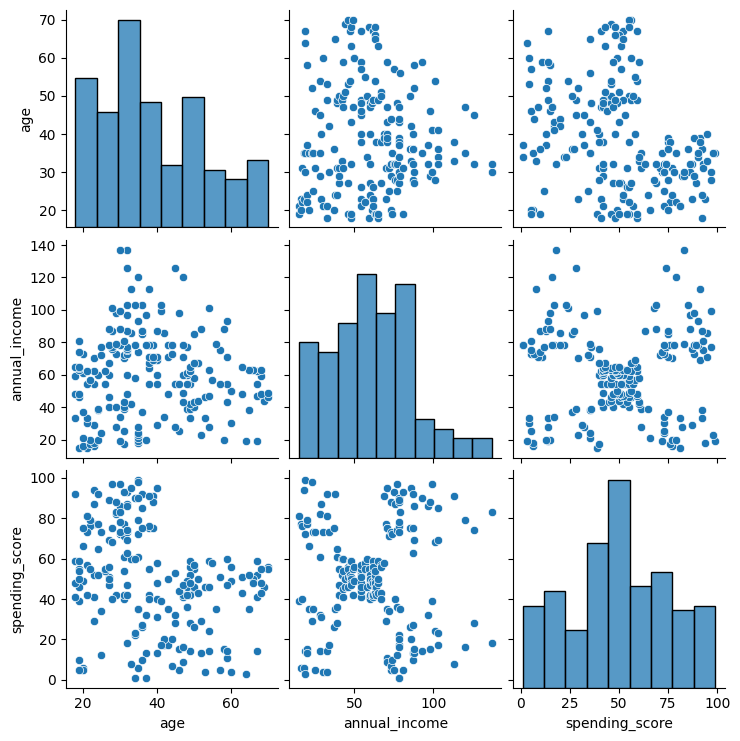

In [18]:
sns.pairplot(df)
plt.show()

---
---

## 3. Cluster Analysis

The purpose of the project is to perform cluster analysis using [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) and [Hierarchical Clustering](https://medium.com/analytics-vidhya/hierarchical-clustering-d2d92835280c) algorithms.
Using a maximum of two variables for each analysis can help to identify cluster labels more clearly.
The K-Means algorithm requires determining the number of clusters using the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering), while Hierarchical Clustering builds a dendrogram without defining the number of clusters beforehand. Different labeling should be done based on the information obtained from each analysis.
Labeling example:

- **Normal Customers**  -- An Average consumer in terms of spending and Annual Income
- **Spender Customers** --  Annual Income is less but spending high, so can also be treated as potential target customer.

### Clustering based on Age and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [19]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [20]:
X1 = df.drop(columns = ['annual_income', 'gender'])
X1

,age,spending_score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


In [21]:
# We have imported StandardScaler and MinMaxScaler.
# Because age and spending_score are on different scales, we will standardize both features.

scaler = MinMaxScaler()
X1_scaled = scaler.fit_transform(X1)

# We ran two different solutions with scaled and unscaled data. The latter provided better results. 

#### *ii. Determine optimal number of clusters*

### Step - 1 Hopkins Test
Here we use Hopkins Test to assess the clustering tendency of the data. 

In [22]:
# function to compute hopkins's statistic for the dataframe X
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
def hopkins(X, ratio=0.05):

    if not isinstance(X, np.ndarray):
      X=X.values  #convert dataframe to a numpy array
    sample_size = int(X.shape[0] * ratio) #0.05 (5%) based on paper by Lawson and Jures

    #a uniform random sample in the original data space
    X_uniform_random_sample = uniform(X.min(axis=0), X.max(axis=0) ,(sample_size , X.shape[1]))

    #a random sample of size sample_size from the original data X
    random_indices=sample(range(0, X.shape[0], 1), sample_size)
    X_sample = X[random_indices]

    #initialise unsupervised learner for implementing neighbor searches
    neigh = NearestNeighbors(n_neighbors=2)
    nbrs=neigh.fit(X)

    #u_distances = nearest neighbour distances from uniform random sample
    u_distances , u_indices = nbrs.kneighbors(X_uniform_random_sample , n_neighbors=2)
    u_distances = u_distances[: , 0] #distance to the first (nearest) neighbour

    #w_distances = nearest neighbour distances from a sample of points from original data X
    w_distances , w_indices = nbrs.kneighbors(X_sample , n_neighbors=2)
    #distance to the second nearest neighbour (as the first neighbour will be the point itself, with distance = 0)
    w_distances = w_distances[: , 1]

    u_sum = np.sum(u_distances)
    w_sum = np.sum(w_distances)

    #compute and return hopkins' statistic
    H = u_sum/ (u_sum + w_sum)
    return H

In [23]:
X1.shape

(200, 2)

In [24]:
hopkins(X1, 0.05)
# each time we run the function, we obtain a different score because the function selects a different subsample

0.7279404844820992

In [25]:
hopkins(X1, 1)
# this uses the full data 

0.7248193652381713

In [26]:
result=[]
for _ in range(10):
    result.append(hopkins(X1, 1))
np.mean(result)

0.6976544958713105

### Step - 2 Choose optimal number of clusters
Now that we have assessed the clustering tendency using Hopkins Test, we identify the optimal number of clusters using elbow method. We will use two criteria : inertia-error and distortion.


In [27]:
from sklearn.cluster import KMeans

ssd = []

K = range(2,10)

for k in K:
    model = KMeans(n_clusters =k,
                   random_state=42)
    model.fit(X1)
    ssd.append(model.inertia_)

Text(0.5, 1.0, 'elbow method')

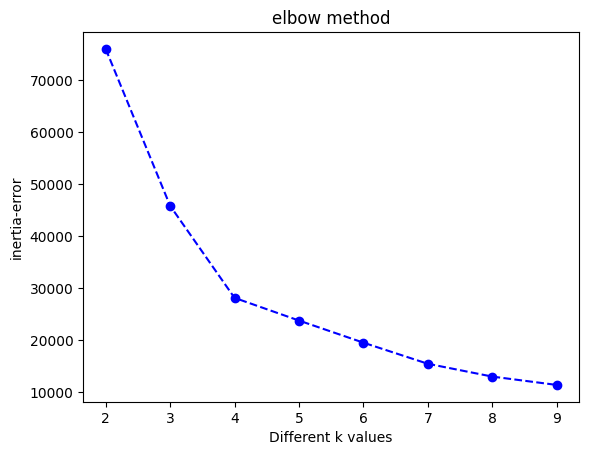

In [28]:
plt.plot(K, ssd, "bo--")
plt.xlabel("Different k values")
plt.ylabel("inertia-error")
plt.title("elbow method")

In [29]:
ssd # sum of squared distance

# the first ssd score corresponds to 2 cluster solution, the second to 3 clusters, and so on.

[75949.15601023017,
 45840.67661610868,
 28165.583566629342,
 23811.52352472089,
 19566.522341377608,
 15514.193134351031,
 13055.626865965576,
 11453.288911292717]

In [30]:
-pd.Series(ssd).diff()

0             NaN
1    30108.479394
2    17675.093049
3     4354.060042
4     4245.001183
5     4052.329207
6     2458.566268
7     1602.337955
dtype: float64

In [31]:
import plotly.express as px
fig = px.line(x=K,
              y=ssd,
              range_x=[1, 10],
              hover_name=pd.Series(ssd).diff().values)

fig.show()

In [32]:
K = range(2, 10)
distortion = []
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=42)
    kmeanModel.fit(X1)
    distances = kmeanModel.transform(X1) # distances from each observation to each cluster centroid
    labels = kmeanModel.labels_
    result = []
    for i in range(k):
        cluster_distances = distances[labels == i, i] # distances from observations in each cluster to their own centroid
        result.append(np.mean(cluster_distances ** 2)) # calculate the mean of squared distances from observations in each cluster to their own centroid and add it to the result list
    distortion.append(sum(result)) # sum the means of all clusters and add it to the distortion list

Text(0.5, 1.0, 'elbow method')

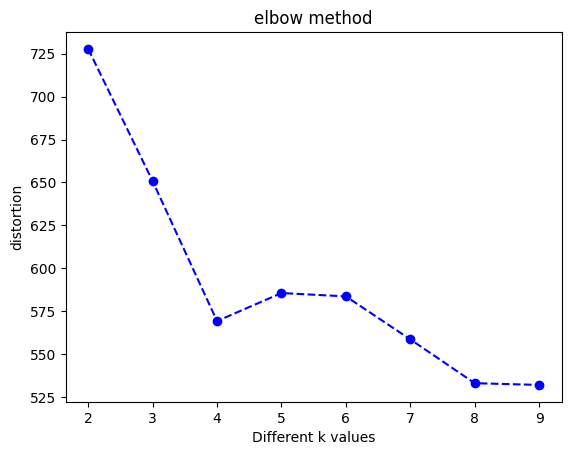

In [33]:
plt.plot(K, distortion, "bo--")
plt.xlabel("Different k values")
plt.ylabel("distortion")
plt.title("elbow method")

### Step - 3 Silhoutte Analysis

In [34]:
from sklearn.metrics import silhouette_score
# silhouette_score ; It is a metric that measures the quality of our clustering.
# When calculating, both inter cluster distance and intra cluster distance are taken into account.
# ranges -1 to 1, bad to good respectively.

In [35]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters,
                    random_state=42)
    kmeans.fit(X1)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X1, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.4692341232501655
For n_clusters=3, the silhouette score is 0.45300127016521263
For n_clusters=4, the silhouette score is 0.49973941540141753
For n_clusters=5, the silhouette score is 0.44526667994351227
For n_clusters=6, the silhouette score is 0.44845919861907363
For n_clusters=7, the silhouette score is 0.42313509747504796
For n_clusters=8, the silhouette score is 0.4280182657184854


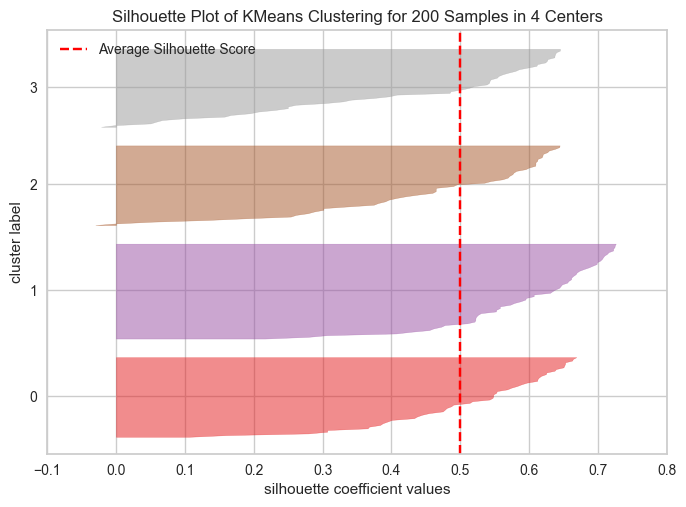

In [36]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model4 = KMeans(n_clusters=4,
                random_state=42)          # we decided n_clusters=6!
visualizer = SilhouetteVisualizer(model4)

visualizer.fit(X1)    # Fit the data to the visualizer
visualizer.poof();

# With this feature of yellowbrick, we can see the silhouette scores of each cluster separately.

In [37]:
model4.labels_

array([3, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 3, 3, 2, 1, 3, 1,
       2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 0, 3,
       2, 3, 0, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3,
       3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 1, 3, 1, 0, 1, 2, 1, 2, 1,
       3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [38]:
## Let's see the average silhoutte scores for each of the six classes:
for i in range(4):
    label = (model4.labels_== i)
    print(f"mean silhouette score for label {i:<4} : {visualizer.silhouette_samples_[label].mean()}")
print(f"mean silhouette score for all labels : {visualizer.silhouette_score_}")

mean silhouette score for label 0    : 0.5091299145013191
mean silhouette score for label 1    : 0.5960779476836082
mean silhouette score for label 2    : 0.45429047261675404
mean silhouette score for label 3    : 0.4197289676734112
mean silhouette score for all labels : 0.49973941540141753


#### *iii. Apply K Means*

In [39]:
model = KMeans(n_clusters = 4, random_state=42)
model.fit_predict(X1)

array([3, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 3, 3, 2, 1, 3, 1,
       2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 0, 3,
       2, 3, 0, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3,
       3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 1, 3, 1, 0, 1, 2, 1, 2, 1,
       3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [40]:
model.labels_

array([3, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 3, 3, 2, 1, 3, 1,
       2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 0, 3,
       2, 3, 0, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3,
       3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 1, 3, 1, 0, 1, 2, 1, 2, 1,
       3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [41]:
clusters = model.labels_

In [42]:
X1.head()

,age,spending_score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40


In [43]:
X1["predicted_clusters"] = clusters

In [44]:
X1

,age,spending_score,predicted_clusters
0,19,39,3
1,21,81,1
2,20,6,2
3,23,77,1
4,31,40,3
...,...,...,...
195,35,79,1
196,45,28,2
197,32,74,1
198,32,18,2


#### *iv. Visualizing and Labeling All the Clusters*

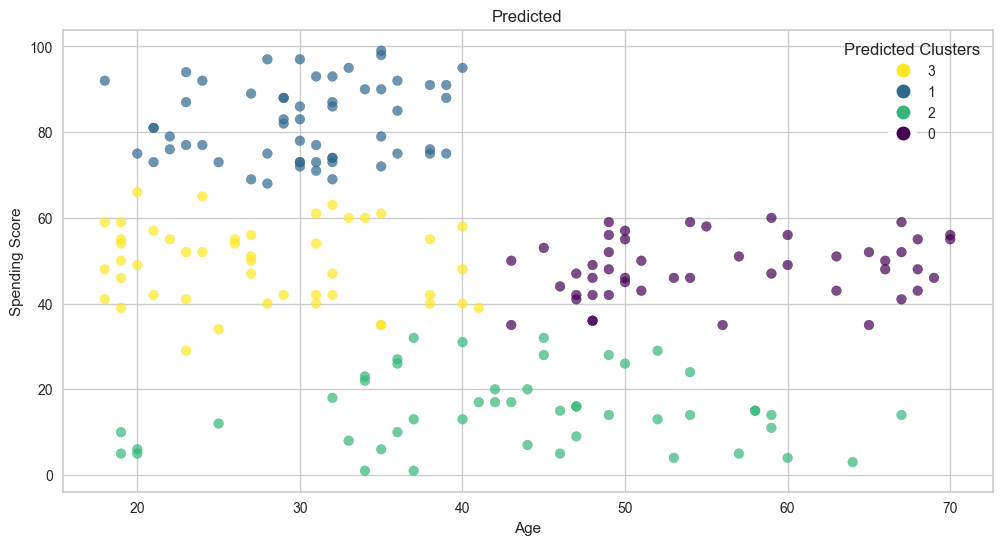

In [45]:
from matplotlib.lines import Line2D

plt.figure(figsize = (12,6))

scatter = plt.scatter(X1["age"],
            X1["spending_score"],
            c=X1.predicted_clusters,
            cmap="viridis",
            alpha=0.7)


# Extract unique cluster labels
unique_labels = X1.predicted_clusters.unique()

# Create legend handles and labels
handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter.to_rgba(label), markersize=10) for label in unique_labels]
labels = [str(label) for label in unique_labels]

# Add a legend with the cluster labels
plt.legend(handles, labels, title="Predicted Clusters")

# Add axis labels
plt.xlabel("Age")
plt.ylabel("Spending Score")

plt.title("Predicted")
plt.show()

In [46]:
X1.groupby('predicted_clusters')[['age', 'spending_score']].agg(['mean', 'min', 'max']).sort_values(by=('age', 'mean'), ascending=True)


age         spending_score        
                         mean min max           mean min max
predicted_clusters                                          
3                   27.617021  18  41      49.148936  29  66
1                   30.175439  18  40      82.350877  68  99
2                   43.291667  19  67      15.020833   1  32
0                   55.708333  43  70      48.229167  35  60

In [47]:
X1['gender'] = df['gender']
X1

,age,spending_score,predicted_clusters,gender
0,19,39,3,Male
1,21,81,1,Male
2,20,6,2,Female
3,23,77,1,Female
4,31,40,3,Female
...,...,...,...,...
195,35,79,1,Female
196,45,28,2,Female
197,32,74,1,Male
198,32,18,2,Male


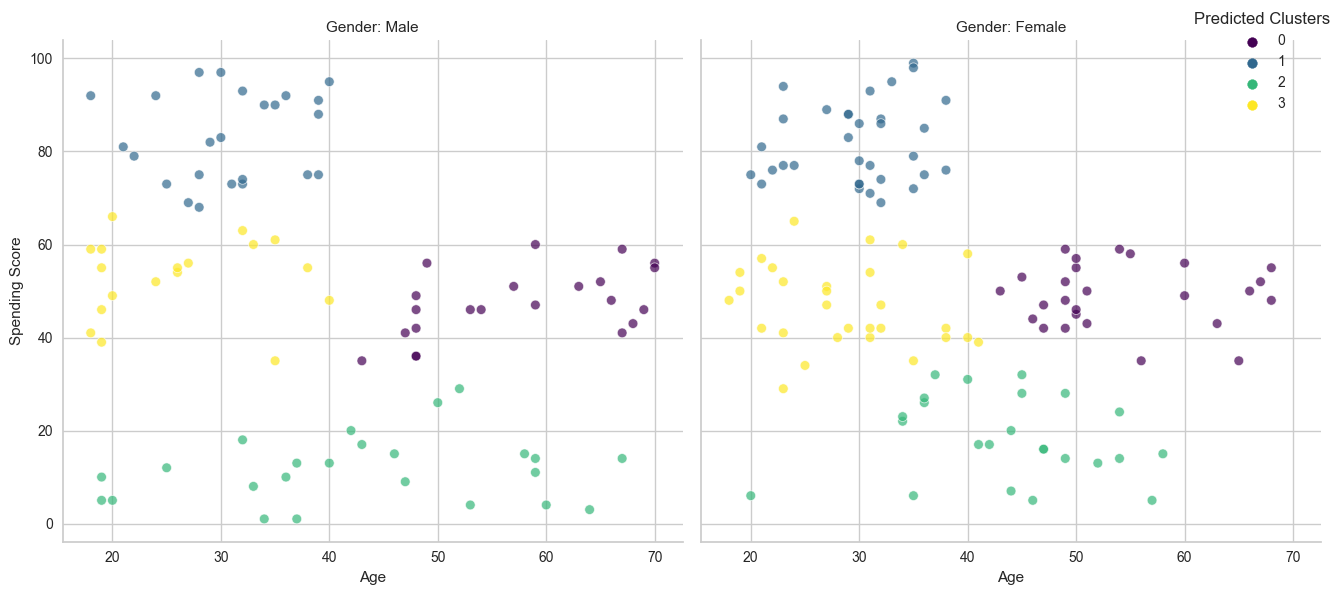

In [48]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns

# Create subplots for each gender category
g = sns.FacetGrid(X1, col="gender", height=6, aspect=1)
g.map_dataframe(
    lambda data, color: sns.scatterplot(
        x=data["age"],
        y=data["spending_score"],
        hue=data["predicted_clusters"],
        palette="viridis",
        alpha=0.7,
    )
)

# Customize legend
g.add_legend(title="Predicted Clusters", loc="upper right")

# Set axis labels
g.set_axis_labels("Age", "Spending Score")

# Set titles for each subplot
g.set_titles("Gender: {col_name}")

# Adjust the layout
plt.tight_layout()
plt.show()


### Clustering based on Annual Income and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [49]:
X2 = df.drop(columns = ['age', 'gender'])
X2

,annual_income,spending_score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [50]:
X2.describe()

,annual_income,spending_score
count,200.000000,200.000000
mean,60.560000,50.200000
std,26.264721,25.823522
min,15.000000,1.000000
25%,41.500000,34.750000
50%,61.500000,50.000000
75%,78.000000,73.000000
max,137.000000,99.000000


In [51]:
# We have imported StandardScaler and MinMaxScaler.
# Because age and spending_score are on different scales, we will standardize both features.

scaler = MinMaxScaler()
X2_scaled = scaler.fit_transform(X2)

#### *ii. Determine optimal number of clusters*

### Step - 1 Hopkins Test
Here we use Hopkins Test to assess the clustering tendency of the data. 

In [52]:
X2.shape

(200, 2)

In [53]:
# Note that we have already defined our function and it is ready for use

hopkins(X2, 0.05)
# each time we run the function, we obtain a different score because the function selects a different subsample each time

0.6790760344268921

In [54]:
hopkins(X2, 1)
# this uses the full data 

0.7093073765245969

In [55]:
result=[]
for _ in range(10):
    result.append(hopkins(X2, 1))
np.mean(result)

# Hopkins test suggests that our data has good cluster-ability.

0.6919775715832945

### Step - 2 Choose optimal number of clusters
Now that we have assessed the clustering tendency using Hopkins Test, we identify the optimal number of clusters using elbow method. We will use two criteria : inertia-error and distortion.


In [56]:
from sklearn.cluster import KMeans

ssd = []

K = range(2,10)

for k in K:
    model = KMeans(n_clusters =k,
                   random_state=42)
    model.fit(X2)
    ssd.append(model.inertia_)

Text(0.5, 1.0, 'elbow method')

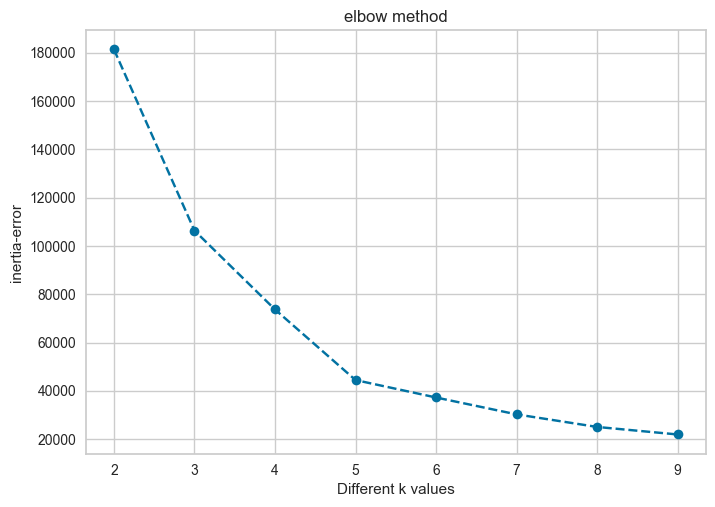

In [57]:
plt.plot(K, ssd, "bo--")
plt.xlabel("Different k values")
plt.ylabel("inertia-error")
plt.title("elbow method")

In [58]:
ssd # sum of squared distance

[181363.59595959593,
 106348.37306211118,
 73679.78903948836,
 44448.45544793371,
 37233.81451071001,
 30241.343617936593,
 25036.41760403398,
 21916.794789843727]

In [59]:
-pd.Series(ssd).diff()

0             NaN
1    75015.222897
2    32668.584023
3    29231.333592
4     7214.640937
5     6992.470893
6     5204.926014
7     3119.622814
dtype: float64

In [60]:
import plotly.express as px
fig = px.line(x=K,
              y=ssd,
              range_x=[1, 10],
              hover_name=pd.Series(ssd).diff().values)

fig.show()

In [61]:
K = range(2, 10)
distortion = []
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=42)
    kmeanModel.fit(X2)
    distances = kmeanModel.transform(X2) # distances from each observation to each cluster centroid
    labels = kmeanModel.labels_
    result = []
    for i in range(k):
        cluster_distances = distances[labels == i, i] # distances from observations in each cluster to their own centroid
        result.append(np.mean(cluster_distances ** 2)) # calculate the mean of squared distances from observations in each cluster to their own centroid and add it to the result list
    distortion.append(sum(result)) # sum the means of all clusters and add it to the distortion list

Text(0.5, 1.0, 'elbow method')

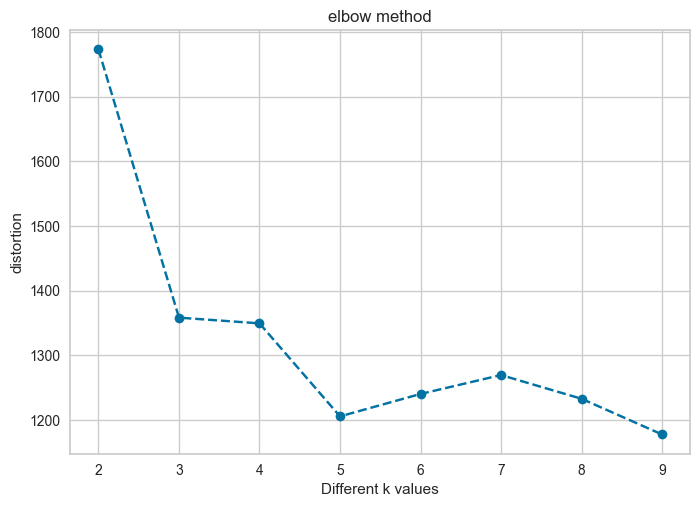

In [62]:
plt.plot(K, distortion, "bo--")
plt.xlabel("Different k values")
plt.ylabel("distortion")
plt.title("elbow method")

### Silhoutte Analysis

In [63]:
from sklearn.metrics import silhouette_score
# silhouette_score ; It is a metric that measures the quality of our clustering.
# When calculating, both inter cluster distance and intra cluster distance are taken into account.
# ranges -1 to 1, bad to good respectively.

In [64]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters,
                    random_state=42)
    kmeans.fit(X2)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X2, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.2968969162503008
For n_clusters=3, the silhouette score is 0.46761358158775435
For n_clusters=4, the silhouette score is 0.4931963109249047
For n_clusters=5, the silhouette score is 0.553931997444648
For n_clusters=6, the silhouette score is 0.53976103063432
For n_clusters=7, the silhouette score is 0.5288104473798049
For n_clusters=8, the silhouette score is 0.45481197931195283


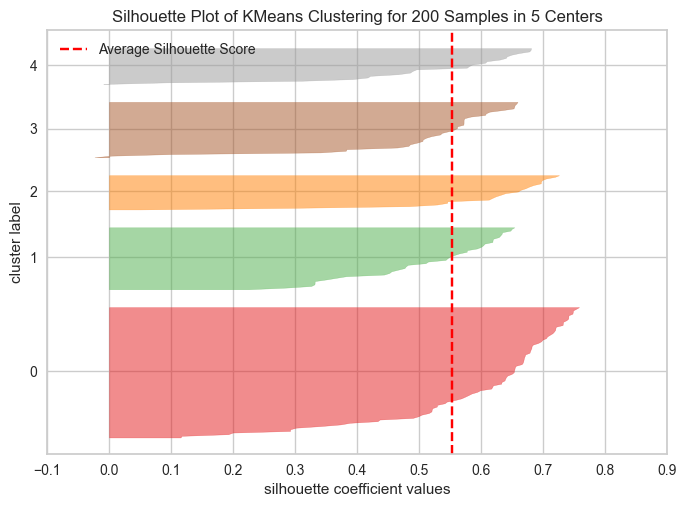

In [65]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model5 = KMeans(n_clusters=5,
                random_state=42)          # we decided n_clusters=5!
visualizer = SilhouetteVisualizer(model5)

visualizer.fit(X2)    # Fit the data to the visualizer
visualizer.poof();

# With this feature of yellowbrick, we can see the silhouette scores of each cluster separately.

In [66]:
model5.labels_

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

In [67]:
## Let's see the average silhoutte scores for each of the five classes:
for i in range(5):
    label = (model5.labels_== i)
    print(f"mean silhouette score for label {i:<4} : {visualizer.silhouette_samples_[label].mean()}")
print(f"mean silhouette score for all labels : {visualizer.silhouette_score_}")

mean silhouette score for label 0    : 0.5966512190217801
mean silhouette score for label 1    : 0.5091706489322517
mean silhouette score for label 2    : 0.5990128687006722
mean silhouette score for label 3    : 0.5039873487056818
mean silhouette score for label 4    : 0.5122676140736505
mean silhouette score for all labels : 0.553931997444648


#### *iii. Apply K Means*

In [68]:
model = KMeans(n_clusters = 5, random_state=42)
model.fit_predict(X2)

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

In [69]:
model.labels_

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

In [70]:
clusters = model.labels_

In [71]:
X2.head()

,annual_income,spending_score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [72]:
X2["predicted_clusters"] = clusters

In [73]:
X2

,annual_income,spending_score,predicted_clusters
0,15,39,4
1,15,81,2
2,16,6,4
3,16,77,2
4,17,40,4
...,...,...,...
195,120,79,1
196,126,28,3
197,126,74,1
198,137,18,3


#### *iv. Visualizing and Labeling All the Clusters*

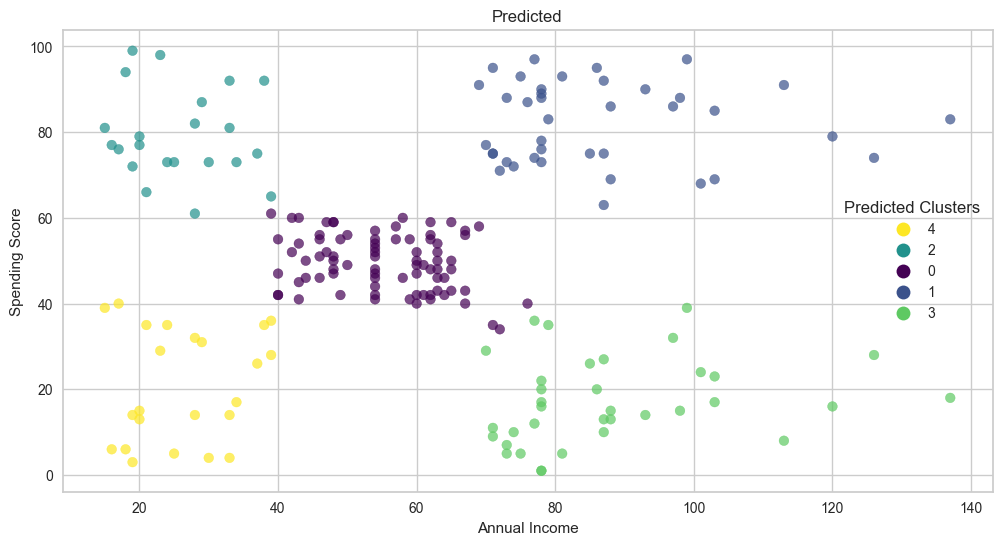

In [74]:
from matplotlib.lines import Line2D

plt.figure(figsize = (12,6))

scatter = plt.scatter(X2["annual_income"],
            X2["spending_score"],
            c=X2.predicted_clusters,
            cmap="viridis",
            alpha=0.7)


# Extract unique cluster labels
unique_labels = X2.predicted_clusters.unique()

# Create legend handles and labels
handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter.to_rgba(label), markersize=10) for label in unique_labels]
labels = [str(label) for label in unique_labels]

# Add a legend with the cluster labels
plt.legend(handles, labels, title="Predicted Clusters")

# Add axis labels
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")

plt.title("Predicted")
plt.show()

In [75]:
X2.groupby('predicted_clusters')[['annual_income', 'spending_score']].agg(['mean', 'min', 'max']).sort_values(by=('annual_income', 'mean'), ascending=True)


annual_income          spending_score        
                            mean min  max           mean min max
predicted_clusters                                              
2                      25.727273  15   39      79.363636  61  99
4                      26.304348  15   39      20.913043   3  40
0                      55.296296  39   76      49.518519  34  61
1                      86.538462  69  137      82.128205  63  97
3                      88.200000  70  137      17.114286   1  39

In [76]:
X2['gender'] = df['gender']
X2.head

<bound method NDFrame.head of      annual_income  spending_score  predicted_clusters  gender
0               15              39                   4    Male
1               15              81                   2    Male
2               16               6                   4  Female
3               16              77                   2  Female
4               17              40                   4  Female
..             ...             ...                 ...     ...
195            120              79                   1  Female
196            126              28                   3  Female
197            126              74                   1    Male
198            137              18                   3    Male
199            137              83                   1    Male

[200 rows x 4 columns]>

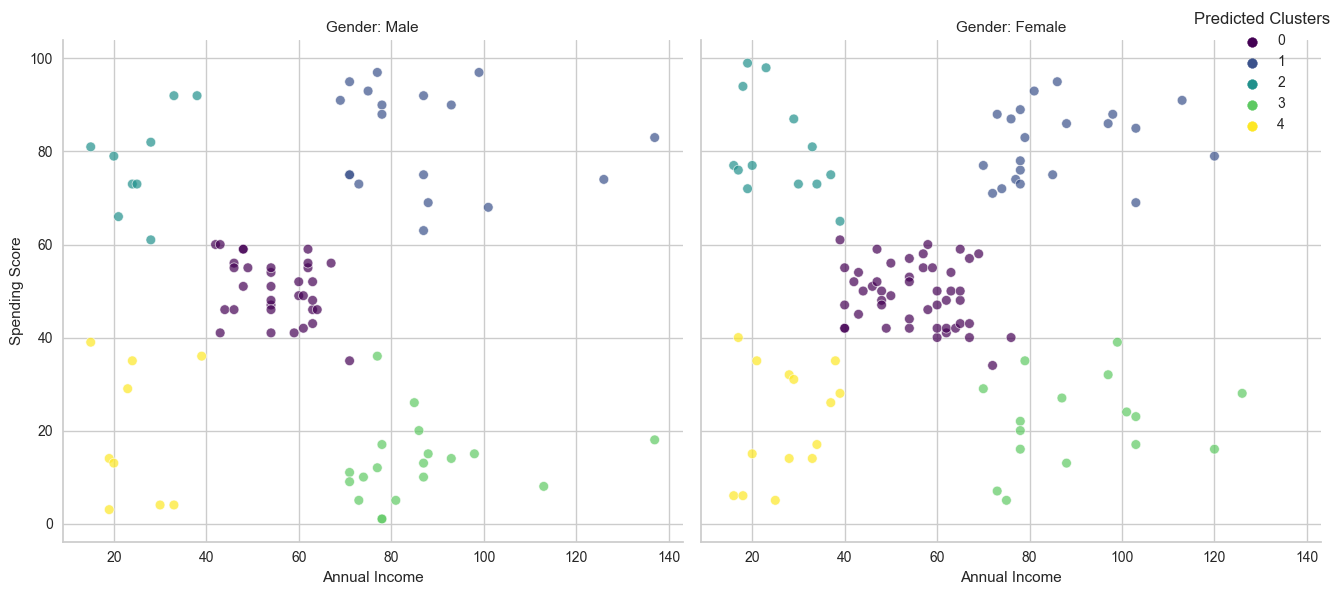

In [77]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns

# Create subplots for each gender category
g = sns.FacetGrid(X2, col="gender", height=6, aspect=1)
g.map_dataframe(
    lambda data, color: sns.scatterplot(
        x=data["annual_income"],
        y=data["spending_score"],
        hue=data["predicted_clusters"],
        palette="viridis",
        alpha=0.7,
    )
)

# Customize legend and place it on the upper right corner
g.add_legend(title="Predicted Clusters", loc="upper right")

# Set axis labels
g.set_axis_labels("Annual Income", "Spending Score")

# Set titles for each subplot
g.set_titles("Gender: {col_name}")

# Adjust the layout
plt.tight_layout()
plt.show()


### Hierarchical Clustering

### *i. Determine optimal number of clusters using Dendrogram*

### Clustering based on Age and Spending Score- x1

In [78]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [79]:
X1 = df.drop(columns = ['annual_income', 'gender'])
X1

,age,spending_score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


In [80]:
hc_ward = linkage(y=X1, method="ward")
hc_complete = linkage(X1, "complete")
hc_average = linkage(X1, "average")
hc_single = linkage(X1, "single")

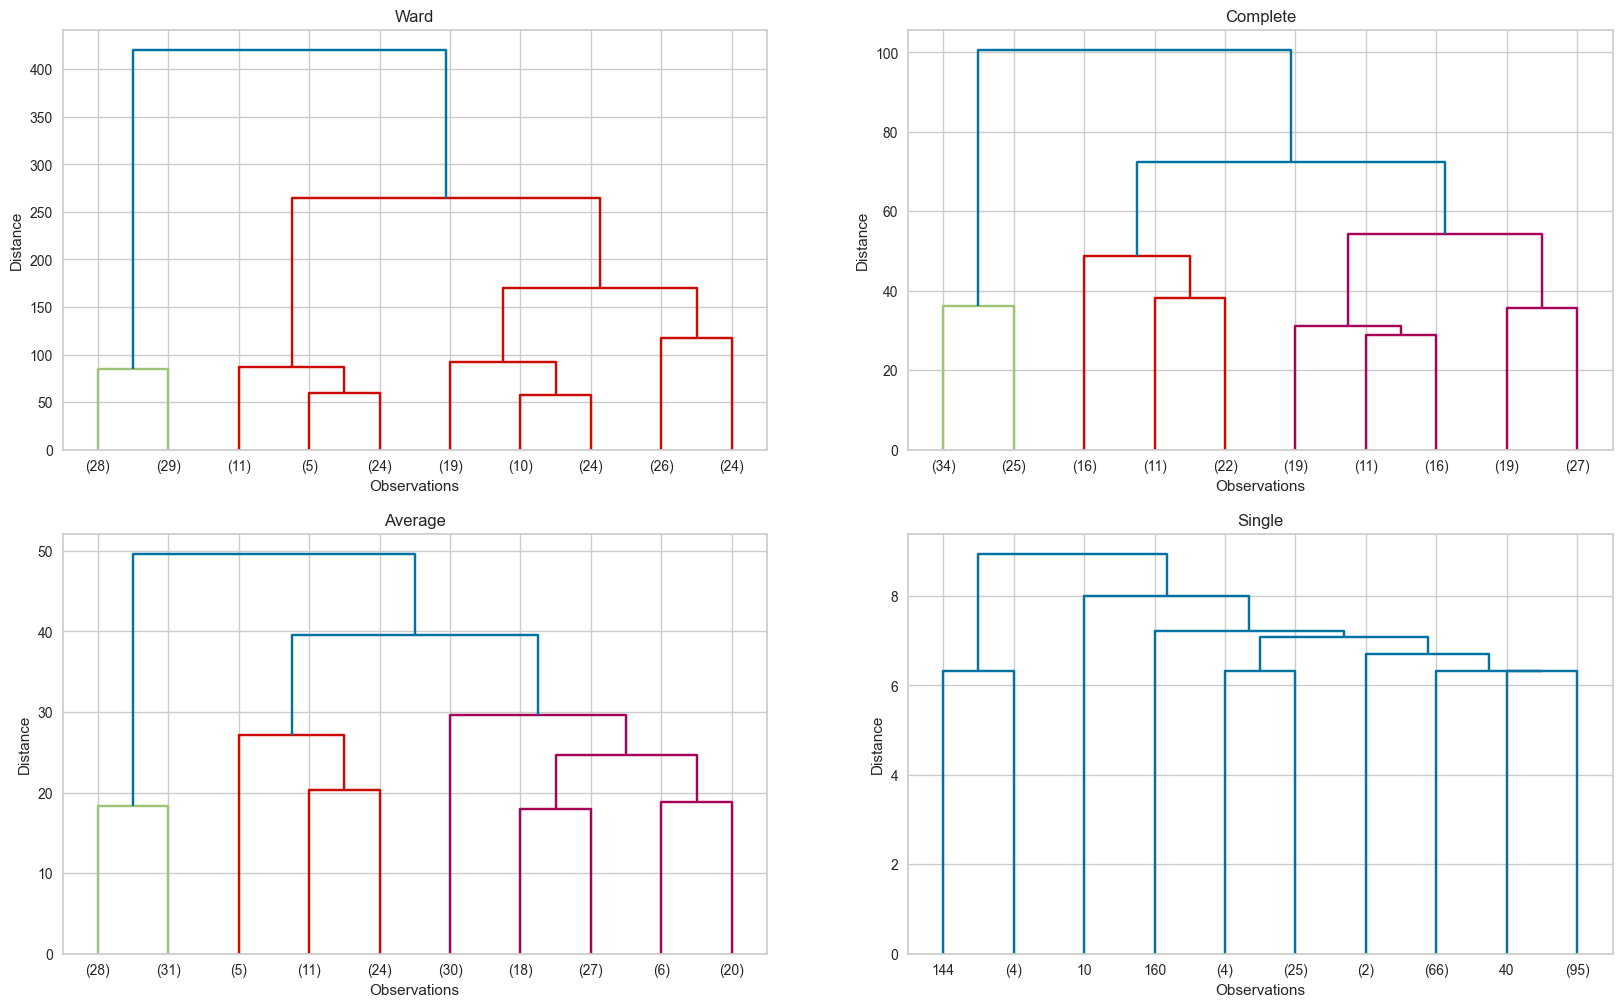

In [81]:
plt.figure(figsize=(20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size=10, truncate_mode='lastp', p=10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size=10, truncate_mode='lastp', p=10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size=10, truncate_mode='lastp', p=10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size=10, truncate_mode='lastp', p=10);

In [82]:
from sklearn.cluster import AgglomerativeClustering

In [83]:
K = range(2,10)

for k in K:
    model = AgglomerativeClustering(n_clusters=k)
    model.fit_predict(X1)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(X1, model.labels_)}')

Silhouette Score for 2 clusters: 0.4549465643222241
Silhouette Score for 3 clusters: 0.4411791686353356
Silhouette Score for 4 clusters: 0.4602496389565028
Silhouette Score for 5 clusters: 0.40374071753059787
Silhouette Score for 6 clusters: 0.4125958704145705
Silhouette Score for 7 clusters: 0.4158977524079244
Silhouette Score for 8 clusters: 0.3883688959732531
Silhouette Score for 9 clusters: 0.3948151533262091


### Clustering based on Annual Income and Spending Score- x2

In [84]:
X2 = df.drop(columns = ['age', 'gender'])
X2

,annual_income,spending_score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [85]:
hc_ward = linkage(y=X2, method="ward")
hc_complete = linkage(X2, "complete")
hc_average = linkage(X2, "average")
hc_single = linkage(X2, "single")

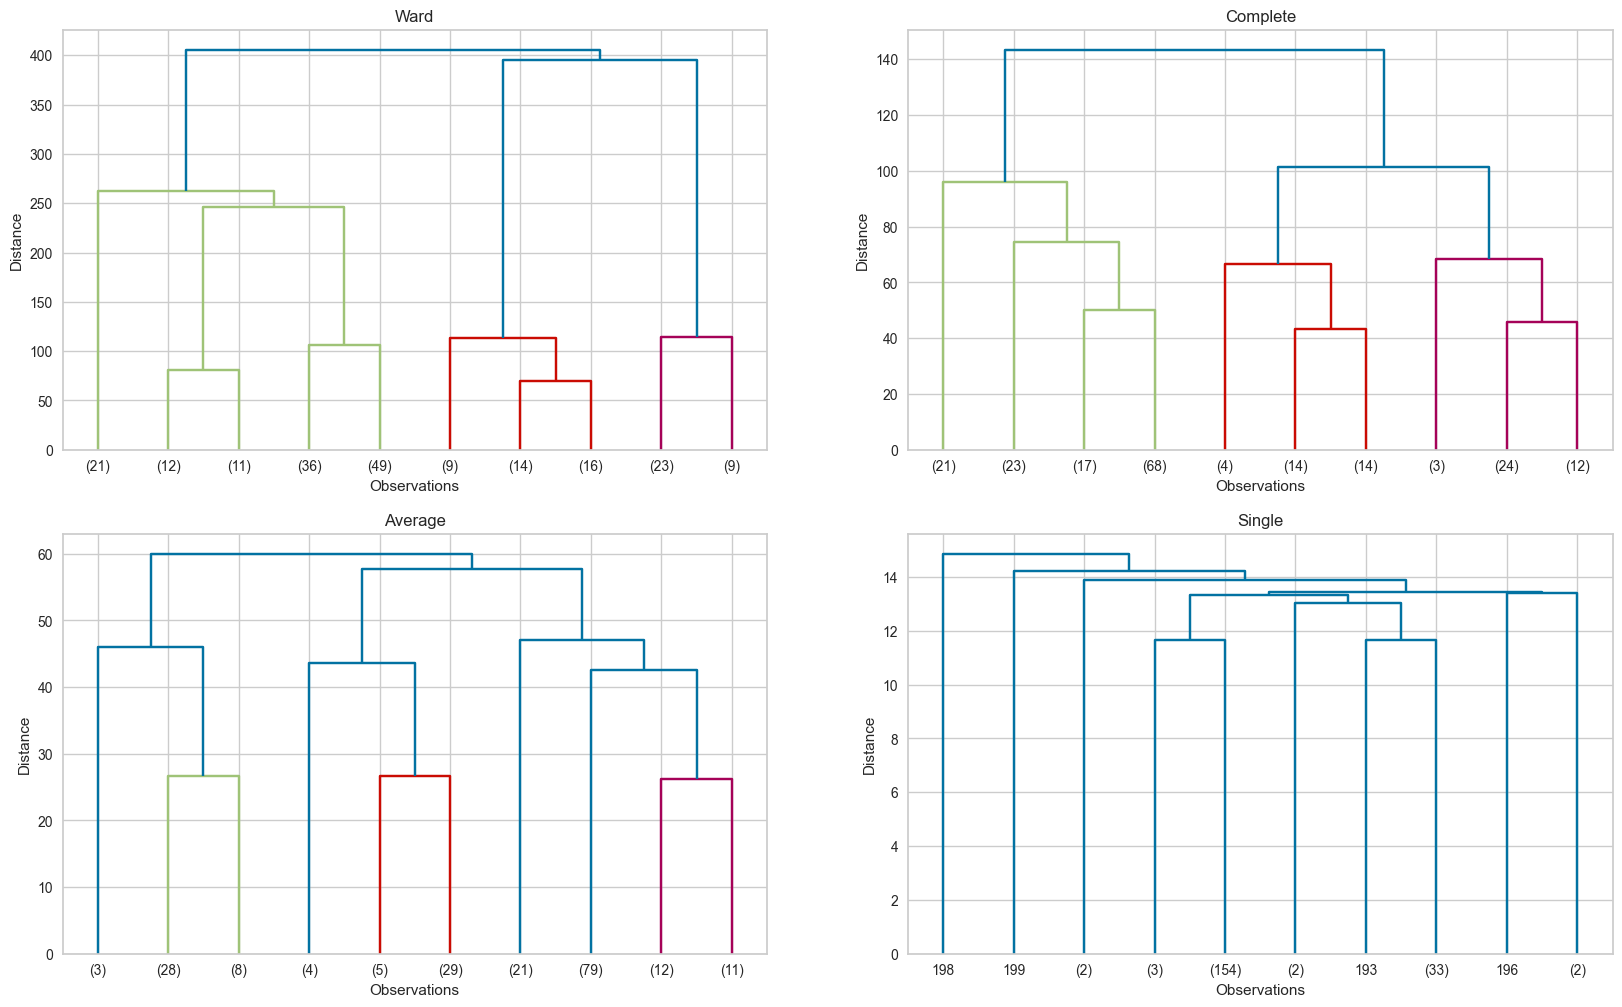

In [86]:
plt.figure(figsize=(20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size=10, truncate_mode='lastp', p=10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size=10, truncate_mode='lastp', p=10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size=10, truncate_mode='lastp', p=10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size=10, truncate_mode='lastp', p=10);

In [87]:
from sklearn.cluster import AgglomerativeClustering

In [88]:
K = range(2,10)

for k in K:
    model = AgglomerativeClustering(n_clusters=k)
    model.fit_predict(X2)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(X2, model.labels_)}')

Silhouette Score for 2 clusters: 0.36706444723912895
Silhouette Score for 3 clusters: 0.4618340266628975
Silhouette Score for 4 clusters: 0.4916598193892782
Silhouette Score for 5 clusters: 0.5529945955148897
Silhouette Score for 6 clusters: 0.5380208285578872
Silhouette Score for 7 clusters: 0.519904611908887
Silhouette Score for 8 clusters: 0.4326286245782246
Silhouette Score for 9 clusters: 0.43892545672004507


### ii. *Apply Agglomerative Clustering*

#### Age and Spending Score- x1

In [89]:
model = AgglomerativeClustering(n_clusters=4,
                                metric="euclidean",
                                linkage="ward")
clusters = model.fit_predict(X1)

In [90]:
X1["clusters"] = clusters
X1.head()

,age,spending_score,clusters
0,19,39,0
1,21,81,3
2,20,6,2
3,23,77,3
4,31,40,0


#### Annual Income and Spending Score- x2

In [91]:
model = AgglomerativeClustering(n_clusters=5,
                                metric="euclidean",
                                linkage="ward")
clusters = model.fit_predict(X2)

In [92]:

X2["clusters"] = clusters
X2.head()

,annual_income,spending_score,clusters
0,15,39,4
1,15,81,3
2,16,6,4
3,16,77,3
4,17,40,4


### iii. *Visualizing and Labeling All the Clusters*

#### Age and Spending Score- x1

<Figure size 2000x1000 with 0 Axes>

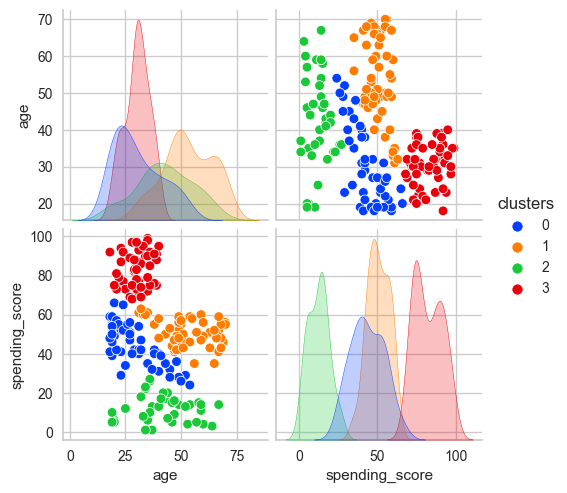

In [93]:
plt.figure(figsize = (20,10))
sns.pairplot(data=X1, hue="clusters", palette="bright");

In [94]:
X1.groupby('clusters')[['age', 'spending_score']].agg(['mean', 'min', 'max']).sort_values(by=('age', 'mean'), ascending=True)

age         spending_score        
               mean min max           mean min max
clusters                                          
3         30.175439  18  40      82.350877  68  99
0         30.520000  18  54      43.620000  24  66
2         42.650000  19  67      12.275000   1  27
1         53.169811  31  70      50.452830  35  63

#### Annual Income and Spending Score- x2

<Figure size 2000x1000 with 0 Axes>

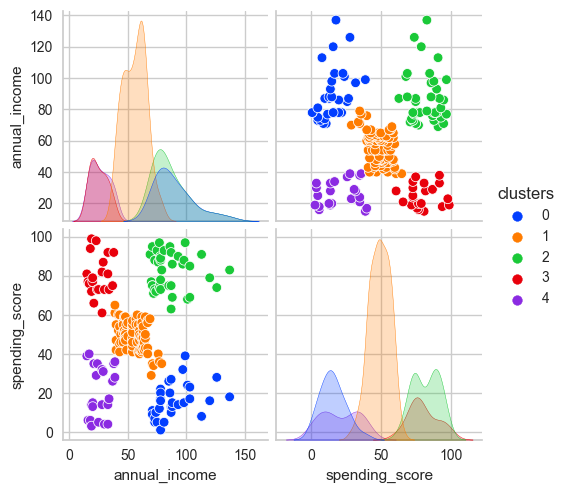

In [95]:
plt.figure(figsize = (20,10))
sns.pairplot(data=X2, hue="clusters", palette="bright");

#### Interpretation based on Age and Spending Score- x1

### Conclusion

We ran two clustering analyses to segment customers based on customer age and spending score: K-means and Hierarchical Clustering.
Although two models suggest 4 clusters, K-means solution is better clustered and more interpretable. 


**cluster 0**: Mid-aged-to-Older (range 43-70) / Medium spender customers. This can also be a target group. We need more data to fine-tune strategies to get this group to spend more. 

**cluster 1**: Younger-to-Older (range 19-67) / low spender customers. 

**cluster 2**: Young-to-Mid-aged (range 18-40) / High spender customers. We need to keep these customers.
    
**cluster 3**: Young-to-Mid-aged (range 18-41) / Medium spender customers. This is our target segment. We need to devise strategies to get these customers to shop more. 




#### Interpretation based on Annual Income and Spending Score- x2

## Conclusion

Both K-means and Hiearchical Clustering models provide consistent solutions with 5 segments. We prefer K-means solution because it provides more clear-cut clustering than Hiearchical Clustering.

**cluster 0**: Medium earner / Medium spender customers. How can we get these segment to spend more? This is a likely target group. 

**cluster 1**: High earner / Low spender customers. This is a likely target group. How can we get these segment to spend more? We need more data to compare this group to high earner/high spender group so that we can address their specific needs.

**cluster 2**: Low earner / Low spender customers. This group has limited income. While not a primary target group, we still can compare this group to low earner/high spender group to get this group to spend more.  

**cluster 3**: Low earner / High spender customers. We need to keep this segment spending as they do. 

**cluster 4**: High earner / High spender customers. We also need this group to keep spending. We cannot lose customers in this segment. 


___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___